<a href="https://colab.research.google.com/github/farahrainaa/farahrainaa/blob/main/2023F_Kelompok_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 12**

Anggota:
1. Farah Raina Febiana (23031554132)
2. Reva Deshinta Isyana (23031554153)
3. Nurul Faridah (23031554123)

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

# metadata
print(support2.metadata)

# variable information
print(support2.variables)

{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [3]:
import pandas as pd

# Gabungkan X dan y menjadi satu DataFrame
data = pd.concat([X, y], axis=1)

# Simpan dataset gabungan ke CSV
data.to_csv("support2_dataset.csv", index=False)

In [4]:
file_path = "support2_dataset.csv"
df = pd.read_csv(file_path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   sex       9105 non-null   object 
 2   dzgroup   9105 non-null   object 
 3   dzclass   9105 non-null   object 
 4   num.co    9105 non-null   int64  
 5   edu       7471 non-null   float64
 6   income    6123 non-null   object 
 7   scoma     9104 non-null   float64
 8   charges   8933 non-null   float64
 9   totcst    8217 non-null   float64
 10  totmcst   5630 non-null   float64
 11  avtisst   9023 non-null   float64
 12  race      9063 non-null   object 
 13  sps       9104 non-null   float64
 14  aps       9104 non-null   float64
 15  surv2m    9104 non-null   float64
 16  surv6m    9104 non-null   float64
 17  hday      9105 non-null   int64  
 18  diabetes  9105 non-null   int64  
 19  dementia  9105 non-null   int64  
 20  ca        9105 non-null   obje

# DATA CLEANING

Visualisasi missing values sebelum cleaning

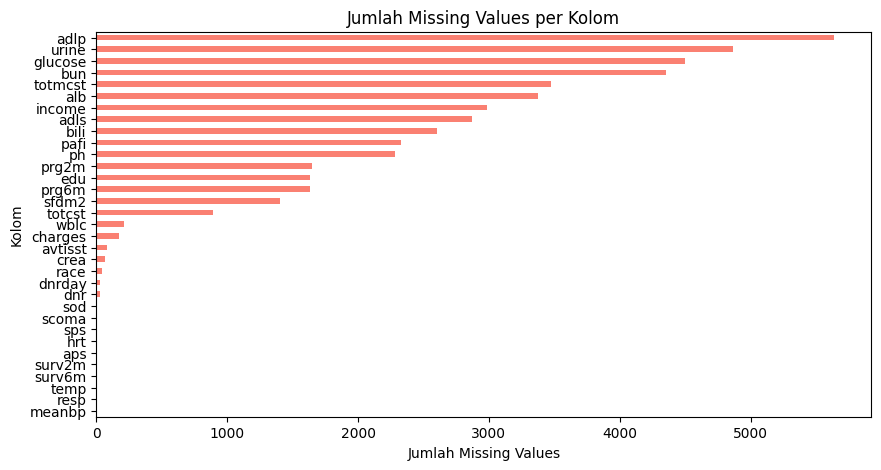

In [6]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot jumlah missing values per kolom
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Hanya tampilkan kolom yang ada missing
missing_counts.sort_values(inplace=True)

plt.figure(figsize=(10, 5))
missing_counts.plot(kind="barh", color="salmon")
plt.xlabel("Jumlah Missing Values")
plt.ylabel("Kolom")
plt.title("Jumlah Missing Values per Kolom")
plt.show()

**HANDLING MISSING VALUES**

Mengecek duplikasi dalam dataset, jika ada yang sama akan didrop

In [7]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

Mengecek jumlah missing values per kolom

In [8]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
edu,1634
income,2982
scoma,1
charges,172
totcst,888
totmcst,3475
avtisst,82
race,42
sps,1
aps,1


Drop kolom glucose, urine, alb, totmcst, adlp karena terlalu banyak missing values (> 40% missing) serta tidak terlalu berpengaruh ke target

In [9]:
columns_to_drop = ["glucose", "urine", "alb", "totmcst", "adlp"]
df_cleaned = df.drop(columns=columns_to_drop)

Imputasi data numerik dengan median karena lebih robust terhadap outlier

In [10]:
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].apply(lambda x: x.fillna(x.median()))

Imputasi data kategorikal dengan modus

In [11]:
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

Mengecek apakah masih ada missing values

In [12]:
df_cleaned.isnull().sum().sum()

0

Visualisasi missing values dengan Pie Chart

In [13]:
import matplotlib.pyplot as plt

missing_values = df_cleaned.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    plt.figure(figsize=(8, 8))
    plt.pie(missing_values, labels=missing_values.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title("Proporsi Missing Values Setelah Cleaning")
    plt.show()
else:
    print("Tidak ada missing values setelah data cleaning!")

Tidak ada missing values setelah data cleaning!


**HANDLING NOISY DATA**

Menghapus outlier menggunakan metode IQR

In [14]:
import pandas as pd
file_path = "support2_dataset.csv"
df = pd.read_csv(file_path)

columns_to_drop = ["glucose", "urine", "alb", "totmcst", "adlp"]
df_cleaned = df.drop(columns=columns_to_drop)
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
Q1 = df_cleaned[num_cols].quantile(0.25)
Q3 = df_cleaned[num_cols].quantile(0.75)
IQR = Q3 - Q1

Filter outlier

In [15]:
df_cleaned = df_cleaned[(df_cleaned[num_cols] >= (Q1 - 1.5 * IQR)) & (df_cleaned[num_cols] <= (Q3 + 1.5 * IQR))]
print(f"Jumlah data setelah menghapus outlier: {df_cleaned.shape}")

Jumlah data setelah menghapus outlier: (9105, 40)


Normalisasi data kategorikal agar lebih konsisten

In [16]:
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_cleaned[col] = df_cleaned[col].str.lower().str.strip()

# DATA REDUCTION

Menghitung korelasi antar kolom agar kolom yang mempunyai kolerasi tinggi (>0.9 atau <-0.9) dapat di redudansi

In [17]:
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
high_corr_features = set()
threshold = 0.9
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if abs(correlation_matrix.loc[idx, col]) > threshold and col != idx:
            high_corr_features.add(col)

high_corr_features

{'adls', 'adlsc', 'charges', 'surv2m', 'surv6m', 'totcst'}

Menghapus kolom yang redudansi

In [18]:
df_reduced = df_cleaned.drop(columns=['surv2m', 'surv6m'])

Menampilkan jumlah kolom setelah redudansi

In [19]:
df_reduced.shape

(9105, 38)

# DATA TRANSFORMATION

In [20]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoders = {}
for col in df_reduced.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_reduced[col] = le.fit_transform(df_reduced[col])
    label_encoders[col] = le  # Menyimpan encoder untuk referensi

scaler = MinMaxScaler()
num_cols = df_reduced.select_dtypes(include=['float64', 'int64']).columns
df_reduced[num_cols] = scaler.fit_transform(df_reduced[num_cols])
df_reduced.head()

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,bili,crea,sod,ph,bun,adls,adlsc,death,hospdead,sfdm2
0,0.517656,0.0,0.0,0.0,0.000000,0.4375,0.0,0.0,0.058686,NaN,...,0.026314,0.343758,0.629630,0.600559,NaN,1.000000,0.989645,0.0,0.0,0.0
1,0.486599,0.0,0.0,0.0,0.333333,0.5000,0.0,NaN,0.228858,NaN,...,NaN,NaN,0.296296,0.000000,NaN,0.142857,0.141378,1.0,1.0,0.0
2,0.392698,0.0,0.0,0.0,0.333333,0.5000,0.0,0.0,0.274167,NaN,...,0.552570,0.593787,0.370370,0.600559,NaN,0.000000,0.000000,1.0,0.0,0.0
3,0.264536,0.0,0.0,0.0,0.333333,0.4375,0.0,0.0,0.013089,NaN,...,NaN,0.218743,0.555556,NaN,NaN,0.000000,0.000000,1.0,0.0,0.0
4,0.728352,0.0,0.0,0.0,0.166667,NaN,0.0,NaN,0.336197,NaN,...,NaN,0.218743,0.703704,0.743019,NaN,0.285714,0.282756,0.0,0.0,0.0


Histogram setelah transformasi

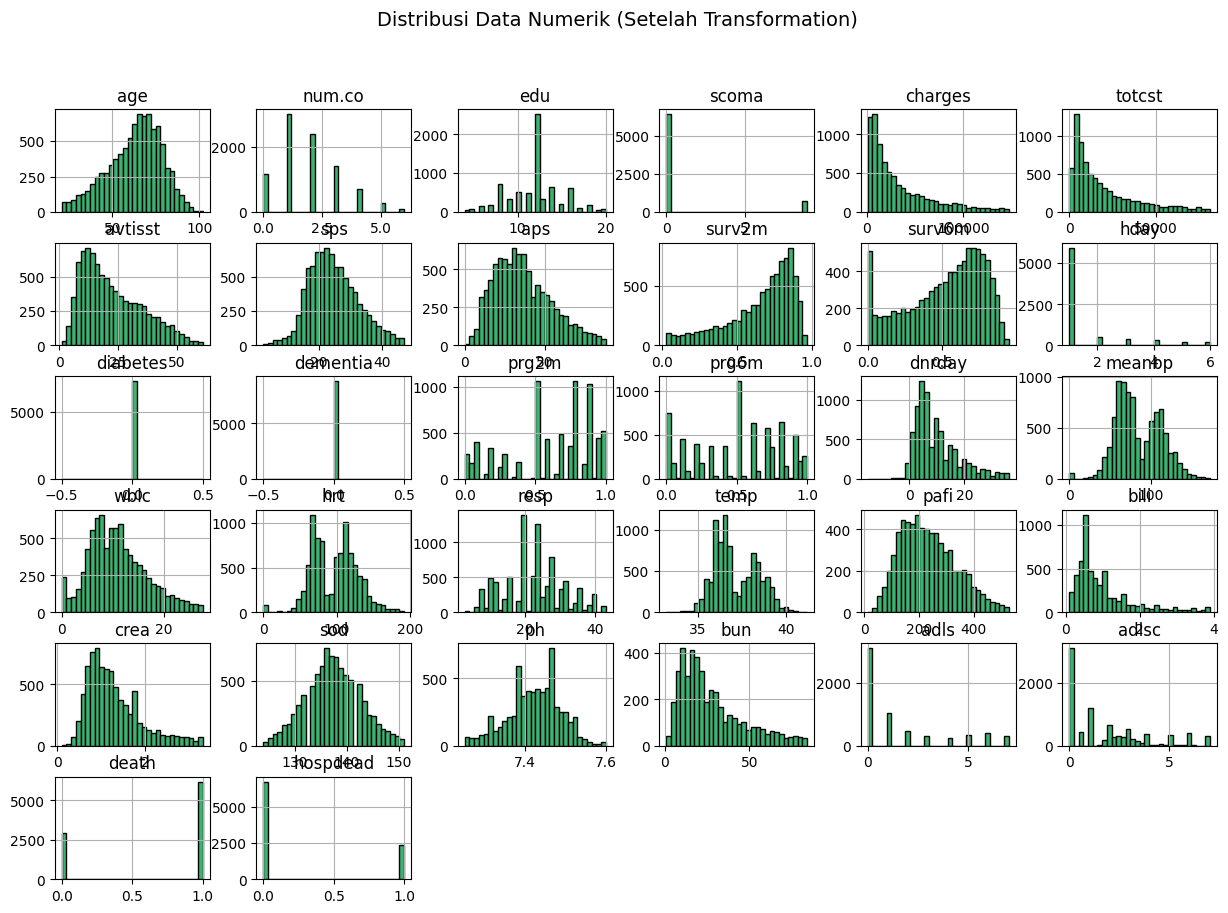

In [21]:
df_transformed = df_cleaned.copy()  # Pastikan ini dataset yang sudah di-normalisasi

df_transformed.hist(figsize=(15, 10), bins=30, color="mediumseagreen", edgecolor="black")
plt.suptitle("Distribusi Data Numerik (Setelah Transformation)", fontsize=14)
plt.show()

In [22]:
print("Missing values di df_cleaned:")
print(df_cleaned.isnull().sum())

print("\nMissing values di df_reduced:")
print(df_reduced.isnull().sum())

print("\nTipe data di df_cleaned:")
print(df_cleaned.dtypes)

print("\nTipe data di df_reduced:")
print(df_reduced.dtypes)

Missing values di df_cleaned:
age           56
sex         9105
dzgroup     9105
dzclass     9105
num.co        25
edu         1833
income      9105
scoma       1956
charges     1084
totcst      1637
avtisst      125
race        9105
sps          284
aps          179
surv2m       308
surv6m         1
hday        1543
diabetes    1778
dementia     296
ca          9105
prg2m       1649
prg6m       1633
dnr         9105
dnrday       829
meanbp         7
wblc         611
hrt           41
resp         314
temp          15
pafi        2415
bili        3527
crea        1054
sod          257
ph          2544
bun         4619
adls        2867
adlsc          0
death          0
hospdead       0
sfdm2       9105
dtype: int64

Missing values di df_reduced:
age           56
sex            0
dzgroup        0
dzclass        0
num.co        25
edu         1833
income         0
scoma       1956
charges     1084
totcst      1637
avtisst      125
race           0
sps          284
aps          179
hday    

Visualisasi perbandingan jumlah missing values antara dataset df_cleaned dan df_reduced

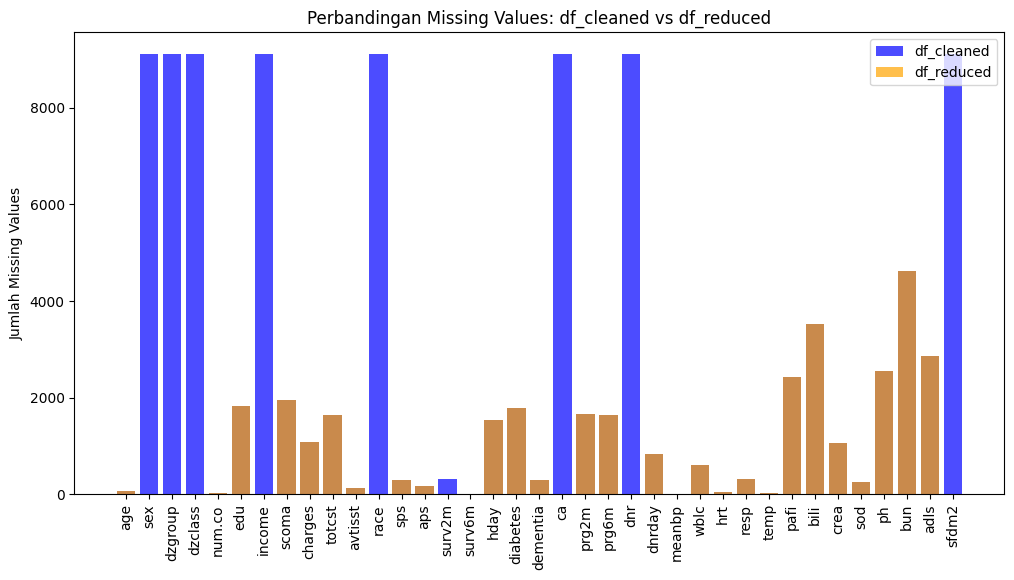

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Hitung missing values
missing_cleaned = df_cleaned.isnull().sum()
missing_reduced = df_reduced.isnull().sum()

# Ambil kolom yang memiliki missing values
missing_cleaned = missing_cleaned[missing_cleaned > 0]
missing_reduced = missing_reduced[missing_reduced > 0]

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(missing_cleaned.index, missing_cleaned.values, alpha=0.7, label="df_cleaned", color="blue")
plt.bar(missing_reduced.index, missing_reduced.values, alpha=0.7, label="df_reduced", color="orange")
plt.xticks(rotation=90)
plt.ylabel("Jumlah Missing Values")
plt.title("Perbandingan Missing Values: df_cleaned vs df_reduced")
plt.legend()
plt.show()

Grafik ini menunjukkan perbandingan jumlah missing values antara df_cleaned (biru) dan df_reduced (oranye) untuk setiap kolom dalam dataset.  

1. Kolom yang memiliki banyak missing values di `df_cleaned` terlihat beberapa kolom memiliki jumlah missing values yang sangat tinggi di `df_cleaned` (biru), contohnya **sex, dzgroup, dzclass, income, race, ca, dnr, sfdm2**. Jumlah missing values ini mencapai hampir 9000-an data yang menunjukkan banyaknya data yang hilang sebelum preprocessing.

2. Pengurangan missing values di `df_reduced` terdapat warna oranye `df_reduced` yang menunjukkan missing values yang tersisa setelah preprocessing. Beberapa kolom yang awalnya memiliki missing values tinggi di `df_cleaned` sudah tidak memiliki missing values sama sekali di `df_reduced`(sex, dzgroup, dzclass, income, race, ca, dnr, sfdm2).  

3. **Kolom yang masih memiliki missing values di `df_reduced`**  
   - Beberapa kolom seperti **edu, scoma, charges, totcst, hday, diabetes, prg2m, prg6m, dnrday, pafi, bili, crea, sod, ph, bun, adls** masih memiliki missing values meskipun jumlahnya berkurang dibandingkan `df_cleaned`.  
   - Artinya, preprocessing belum menghilangkan sepenuhnya missing values pada kolom-kolom tersebut.

### **Kesimpulan**  
- Proses **data reduction & cleaning** telah mengurangi jumlah missing values secara signifikan.  
- Beberapa kolom sudah **bebas dari missing values** setelah proses preprocessing.  
- Masih ada beberapa kolom dengan missing values di `df_reduced`, yang mungkin perlu ditangani lebih lanjut.  


Visualisasi tipe data dengan Bar Chart

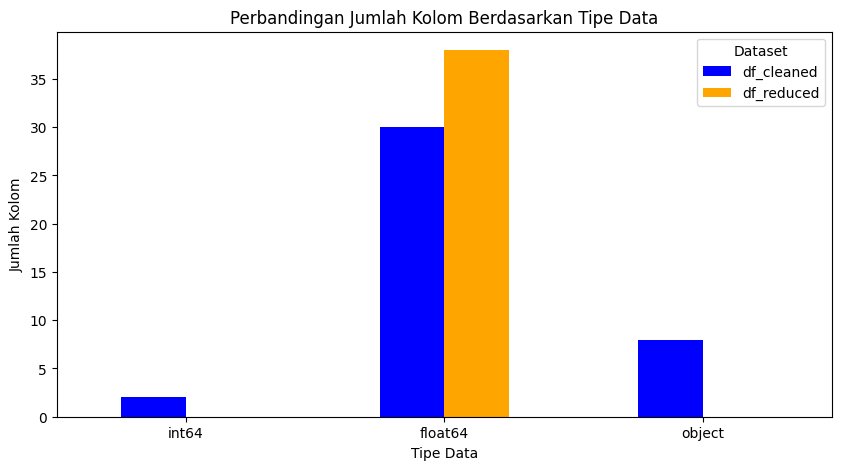

In [24]:
dtype_cleaned = df_cleaned.dtypes.value_counts()
dtype_reduced = df_reduced.dtypes.value_counts()

dtype_df = pd.DataFrame({"df_cleaned": dtype_cleaned, "df_reduced": dtype_reduced}).fillna(0)

dtype_df.plot(kind="bar", figsize=(10, 5), color=["blue", "orange"])
plt.title("Perbandingan Jumlah Kolom Berdasarkan Tipe Data")
plt.ylabel("Jumlah Kolom")
plt.xlabel("Tipe Data")
plt.xticks(rotation=0)
plt.legend(title="Dataset")
plt.show()

# KLASIFIKASI KNN

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

Pisahkan fitur (X) dan target (y)

In [26]:
X = df_reduced.drop('death', axis=1)
y = df_reduced['death']

Encode fitur kategorikal

In [27]:
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

le_target = LabelEncoder()
y = le_target.fit_transform(y)

Bagi data menjadi training dan testing set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Handling missing values sebelum normalisasi

In [29]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

Normalisasi data numerik

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Hyperparameter Tuning dengan GridSearchCV

In [34]:
param_grid = {'n_neighbors': range(1,5)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 5)}, scoring='accuracy')

Best Model

In [32]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

Evaluasi model

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model KNN: {accuracy}")
print(classification_report(y_test, y_pred))

Akurasi Model KNN: 0.7347611202635914
              precision    recall  f1-score   support

           0       0.67      0.37      0.48       594
           1       0.75      0.91      0.82      1227

    accuracy                           0.73      1821
   macro avg       0.71      0.64      0.65      1821
weighted avg       0.72      0.73      0.71      1821

